<a href="https://colab.research.google.com/github/MethEthPro/colab/blob/main/100DL/PERCEPTRON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DEMO OF MAKING A PERCEPTRON , WITHOUT ANY TRAINING(getting optimal values of weights and biases) , WE JUST FIT AND PLOT

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# import the csv file

# Read the CSV file directly into a DataFrame
df = pd.read_csv("placement.csv")

# Display the DataFrame
print(df.head())


   cgpa  resume_score  placed
0  8.14          6.52       1
1  6.17          5.17       0
2  8.27          8.86       1
3  6.88          7.27       1
4  7.52          7.30       1


In [7]:
df.shape
# so 100 rows and 3 columns

(100, 3)

<Axes: xlabel='cgpa', ylabel='resume_score'>

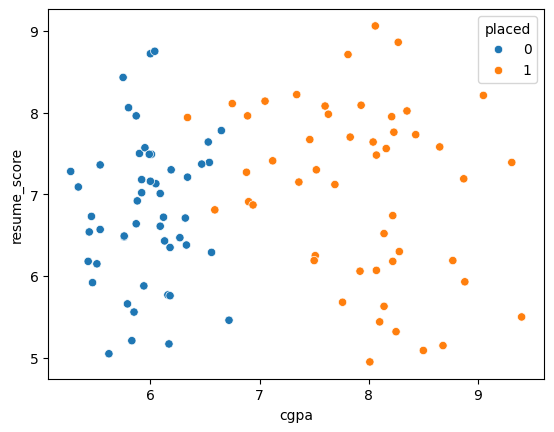

In [11]:
sns.scatterplot(x=df['cgpa'],y=df['resume_score'],hue=df['placed'])

In [17]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [18]:
X.head()

,cgpa,resume_score
0,8.14,6.52
1,6.17,5.17
2,8.27,8.86
3,6.88,7.27
4,7.52,7.30


In [26]:
y.head()

,placed
0,1
1,0
2,1
3,1
4,1


In [20]:
from sklearn.linear_model import Perceptron
p=Perceptron()

In [21]:
p.fit(X,y)

Perceptron()

In [22]:
p.coef_
# so these are the weights predicted by our perceptron


array([[ 40.26, -36.  ]])

In [23]:
p.intercept_
# this is the bias b or the intercept

array([-25.])

In [24]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

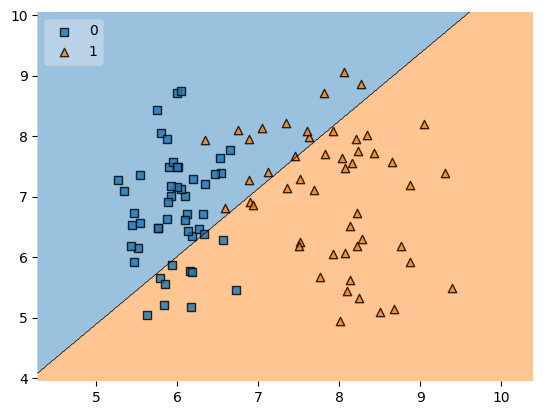

In [25]:
plot_decision_regions(X.values,y.values,clf=p,legend=2)

so obviously this is not good at all , and this was kind of expected as we did no training

NOW WE TRY TO MOVE TOWARDS THE OPTIMAL WEIGHTS AND BIASES USING UPDATION OF WEIGHTS AND BIAS

In [28]:
from sklearn.datasets import make_classification
import numpy as np

In [29]:
# we have genrated our own classification data
# using scikit learn
X,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                        n_classes=2,n_clusters_per_class=1,
                        random_state=41,hypercube=False,
                        class_sep=10)

In [32]:
print(X.shape,X[:5])

(100, 2) [[ 0.19924745 -0.11697552]
 [-0.24882029 -0.73115232]
 [-0.3544904  -0.7081059 ]
 [-1.59086506 -2.01199214]
 [-0.20083951  1.63493163]]


In [34]:
print(y.shape,y[:5])

(100,) [1 1 1 0 1]


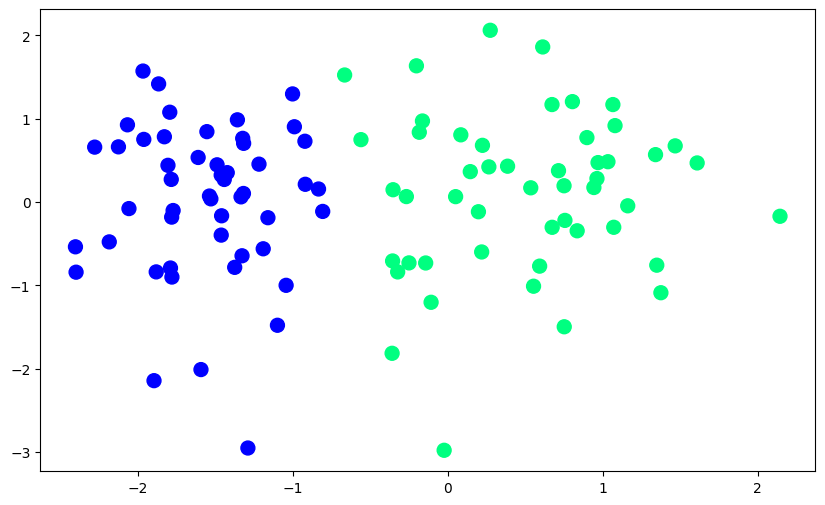

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap="winter",s=100)

now keep in mind the algo of perceptron trick

In [35]:
def step(z):
  if z>=0:
    return 1
  else:
    return 0

In [36]:
def perceptron(X,y):
  # adding 1 at 0th index of our X
  X=np.insert(X,0,1,axis=1)
  # initialising weights as one, so we get w0=1, w1=1 , w2=1
  weights=np.ones(X.shape[1])
  # setting learning rate and epochs
  lr=0.1
  epochs=1000
  for i in range(epochs):
    j=np.random.randint(0,100)
    y_hat=step(np.dot(weights,X[j]))
    weights=weights + lr * (y[j]-y_hat) * (X[j])
  return weights[0],weights[1:]
  # we return the weights and bias(intercept)

In [37]:
intercept_,weights_=perceptron(X,y)

In [38]:
print(weights_)
print(intercept_)

[1.34435571 0.07538783]
1.0


using AX+BY+C=0

and y=mx+c

we geth the coeff m and c to plot our line

In [41]:
m= -(weights_[0]/weights_[1])
b= -(intercept_/weights_[1])

In [43]:
x_input=np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

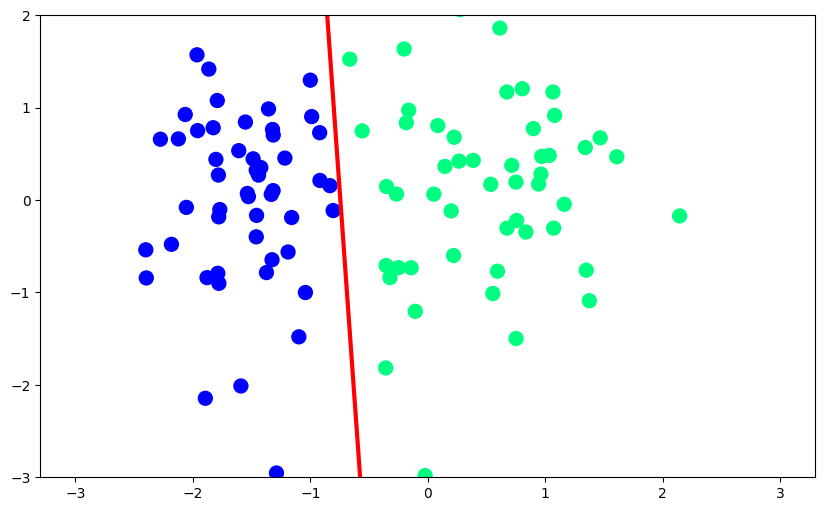

In [46]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap="winter",s=100)
plt.ylim(-3,2)

LOSS FUNCTION IN PERCEPTRONS

and updating weights using gradient decent


In [49]:
X,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                        n_classes=2,n_clusters_per_class=1,
                        random_state=41,hypercube=False,
                        class_sep=15)

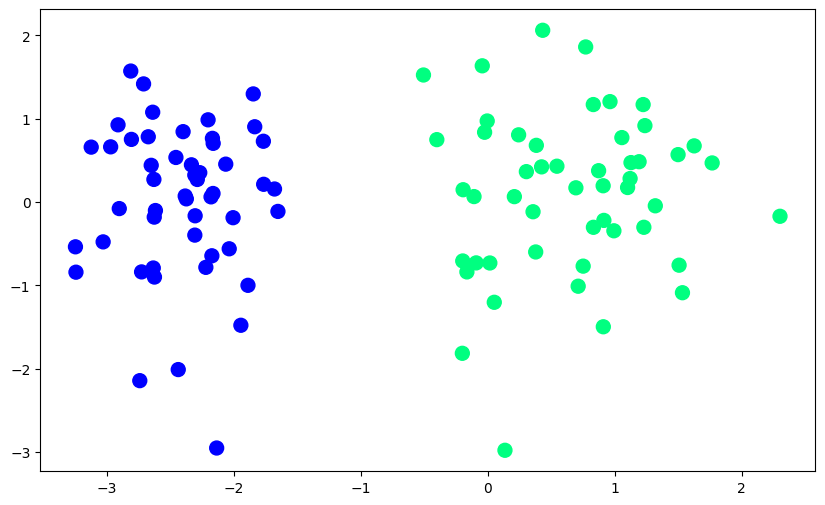

In [50]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap="winter",s=100)

In [52]:
X[:5]

array([[ 0.35523945, -0.11697552],
       [-0.09282829, -0.73115232],
       [-0.1984984 , -0.7081059 ],
       [-2.44001098, -2.01199214],
       [-0.0448475 ,  1.63493163]])

In [51]:
X.shape[0]

100

In [53]:
def perceptron(X,y):
  w1=w2=b=1
  lr=0.1
  epochs=1000

  for i in range(epochs):
    for i in range(X.shape[0]):
      # check condition
      z= w1*X[i][0] + w2*X[i][1] + b*1

      if z*y[i]<0: # i.e if misclassified point
        w1=w1 + lr*y[i]*X[i][0]
        w2=w2 + lr*y[i]*X[i][1]
        b=b + lr*y[i]*1
  return w1,w2,b


In [54]:
w1,w2,b = perceptron(X,y)

In [56]:
print(w1,w2,b)

1.006638570722407 0.22215119727529098 1.3000000000000003


In [55]:
m = -(w1/w2)
c = -(b/w2)

print(m,c)

-4.531321834268464 -5.851870329508209


(-3.0, 2.0)

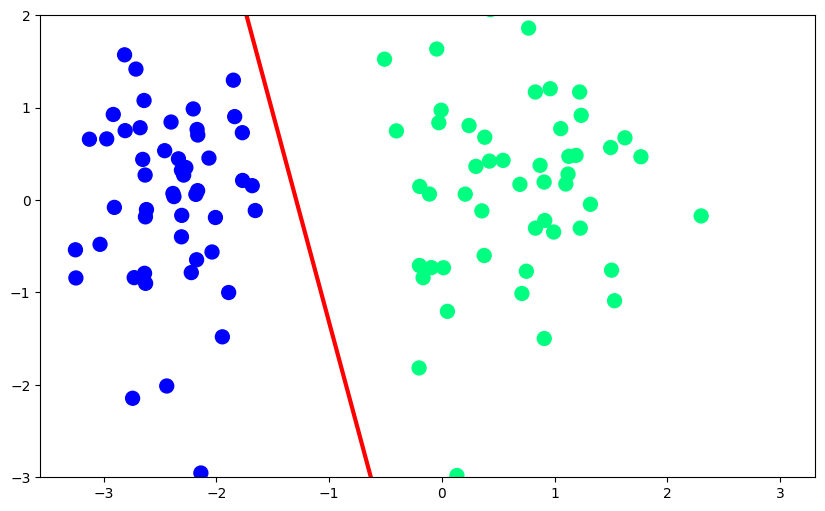

In [57]:
x_input=np.linspace(-3,3,100)
y_input = m*x_input + c

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap="winter",s=100)
plt.ylim(-3,2)

PROBLEM WITH PERCEPTRON IS THAT IT ONLY GIVES HIGH ACCURACY FOR LINEARLY SEPARABLE DATA